In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import export_text, plot_tree

In [46]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [47]:
# Creating our, features_name X and Y
feature_name = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X= diabetes[feature_name]
Y= diabetes['Outcome']

In [54]:
# Spliting data sets for Training and Tsting
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state = 1)

In [55]:
# Creating Instance of class for Decision Tree and making prediction
Decision_tree = DecisionTreeClassifier()
Decision_tree.fit(X_train, Y_train)
Y_pred = Decision_tree.predict(X_test)


In [56]:
# Evalauting the accuracy of the model 
classification=classification_report(Y_pred, Y_test)
confusion=confusion_matrix(Y_pred, Y_test)
accuracy=accuracy_score(Y_pred, Y_test)
print('classification_report: ',classification)
print('confusion_matrix: ', confusion)
print('accuracy_score: ', accuracy)

classification_report:                precision    recall  f1-score   support

           0       0.78      0.77      0.77       100
           1       0.58      0.59      0.59        54

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154

confusion_matrix:  [[77 23]
 [22 32]]
accuracy_score:  0.7077922077922078


In [57]:
# finetuning hyperparameter of the DecisionTree Classifier to enhance its accuracy
Decision_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth=3) 
Decision_tree.fit(X_train, Y_train)
Y_pred = Decision_tree.predict(X_test)
# Evaluating the result for fine tuned Decision Tree Classifier
classification=classification_report(Y_pred, Y_test)
confusion=confusion_matrix(Y_pred, Y_test)
accuracy=accuracy_score(Y_pred, Y_test)
print('classification_report: ',classification)
print('confusion_matrix: ', confusion)
print('accuracy_score: ', accuracy)

classification_report:                precision    recall  f1-score   support

           0       0.89      0.81      0.85       108
           1       0.64      0.76      0.69        46

    accuracy                           0.80       154
   macro avg       0.76      0.79      0.77       154
weighted avg       0.81      0.80      0.80       154

confusion_matrix:  [[88 20]
 [11 35]]
accuracy_score:  0.7987012987012987


In [58]:
# exporting predicted value as text file
Decision_Classifier_text = export_text(Decision_tree)
print(Decision_Classifier_text)

|--- feature_1 <= 127.50
|   |--- feature_5 <= 26.45
|   |   |--- feature_5 <= 9.10
|   |   |   |--- class: 0
|   |   |--- feature_5 >  9.10
|   |   |   |--- class: 0
|   |--- feature_5 >  26.45
|   |   |--- feature_7 <= 28.50
|   |   |   |--- class: 0
|   |   |--- feature_7 >  28.50
|   |   |   |--- class: 0
|--- feature_1 >  127.50
|   |--- feature_1 <= 166.50
|   |   |--- feature_5 <= 29.95
|   |   |   |--- class: 0
|   |   |--- feature_5 >  29.95
|   |   |   |--- class: 1
|   |--- feature_1 >  166.50
|   |   |--- feature_1 <= 172.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  172.50
|   |   |   |--- class: 1



In [59]:
# writing the text file
with open('Decision_diabetes_tree.log', "w") as f:
    f.write(Decision_Classifier_text)

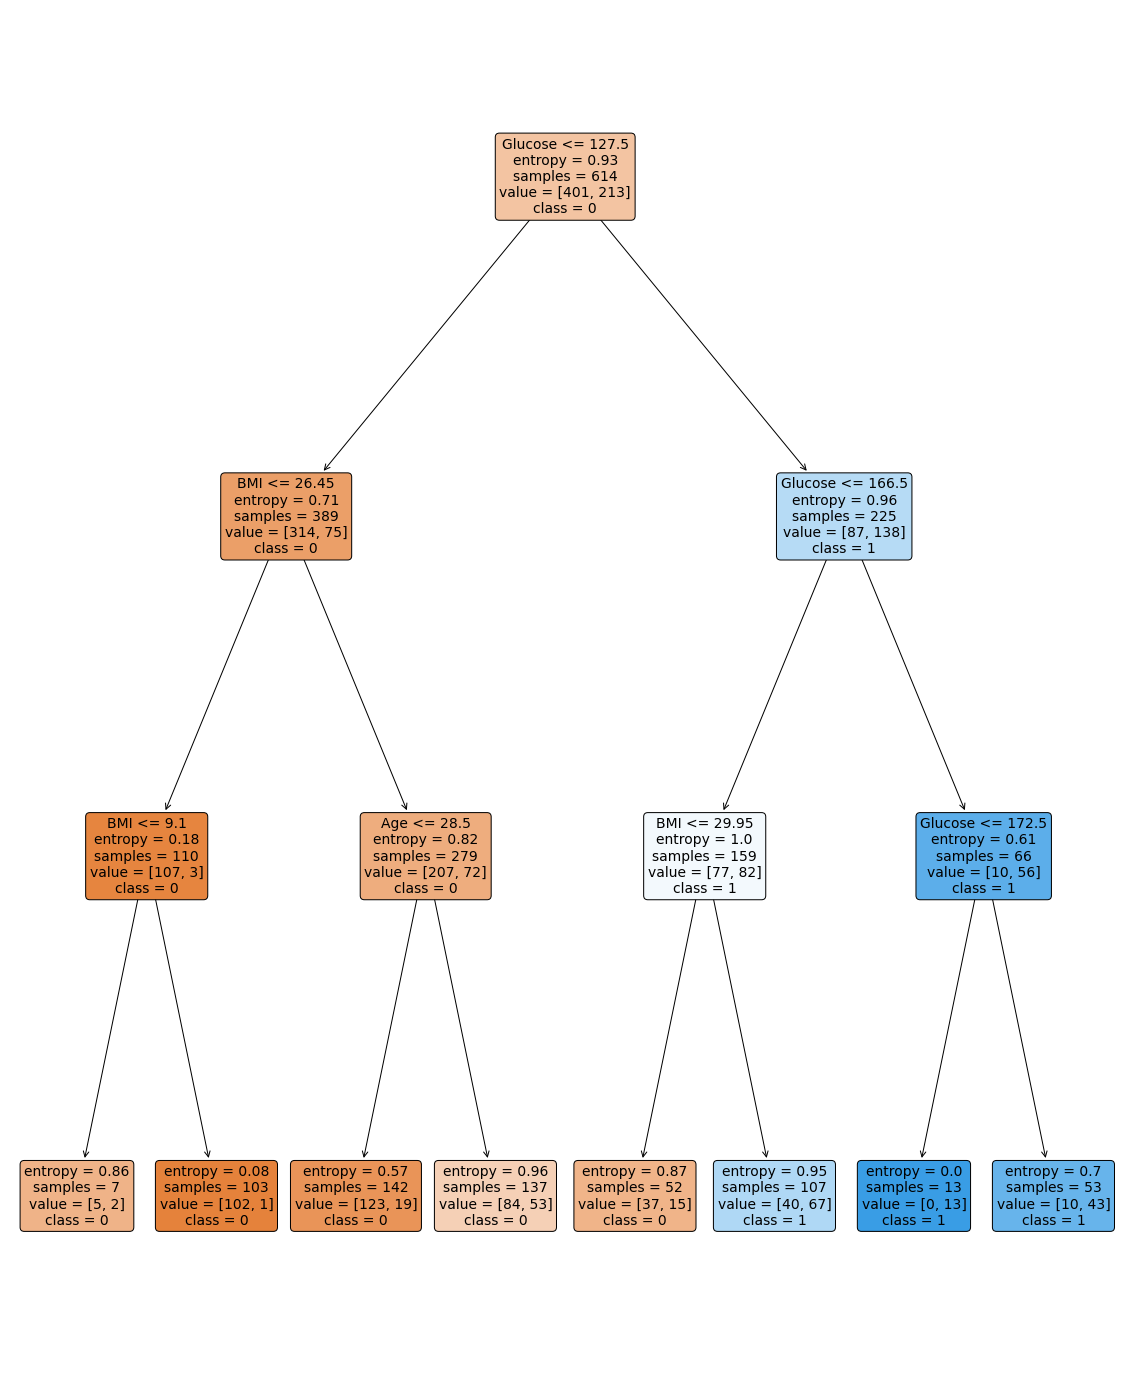

In [62]:
# plotting the decision tree
fig=plt.figure(figsize=(20,25))
_ = plot_tree(Decision_tree, 
                feature_names = feature_name,
                class_names = ['0', '1'],
                rounded = True, 
                precision = 2, filled = True)

In [63]:
plt.savefig('Decision_Tree_Diabetes.png')

<Figure size 432x288 with 0 Axes>